In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [32]:
X,Y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_redundant=0)

In [33]:
Y[Y==0]=-1#brocosting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

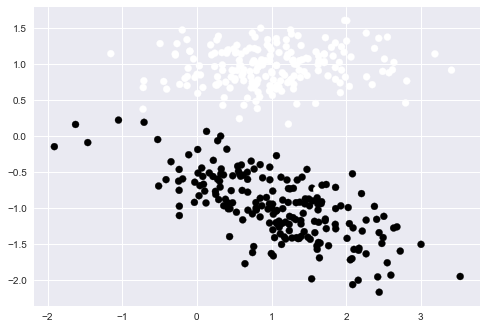

In [34]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [35]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    
    def hingloss(self,W,b,X,Y):
        loss=0
        
        loss+=.5 *np.dot(W,W.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C *max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        n=learning_rate
        c=self.C
        
        #Init modal parameter
        W=np.zeros((1,no_of_features))
        bias=0
        
        print(self.hingloss(W,bias,X,Y))
        
        #traing from here..
        #weight and Bias update rule that we discussed!
        losses=[]
        
        for i in range(maxItr):
            #Traning Loop
            
            l=self.hingloss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradiendt desent with random suffling
            for batch_start in range(0,no_of_samples,batch_size):
                #assum 0 gradiend of batch
                gradw=0
                gradb=0

                for j  in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti= Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                #Gradient for the batch is ready! update W,B
                W=W-n*W+n*gradw
                bias=bias+n*gradb
        self.W=W
        self.b=bias
        return W,b,losses
                
        
        

In [36]:
mySVM=SVM(C=1)


In [37]:
w,b,losses=mySVM.fit(X,Y,maxItr=100)

400.0


In [38]:
print(losses[0])
print(losses[-1])

400.0
14.958776656427425


In [27]:
W,B=mySVM.W,mySVM.b
print(W,B)

[[-0.32240978 -2.03453738]] 0.38600000000000023


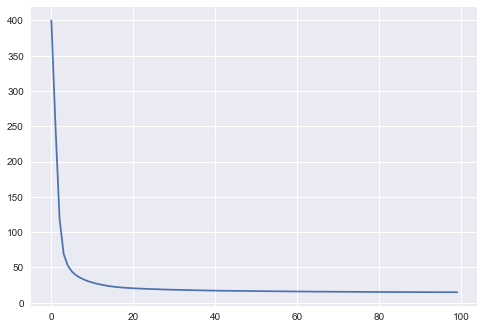

In [28]:
plt.style.use('seaborn')
plt.plot(losses)
plt.show()

In [29]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1=np.linspace(-3,5,10)
    x_2=-(w1*x_1+b)/w2 # WT + B=0
    
    x_p=-(w1*x_1+b+1)/w2 # WT + B=-1
    x_n=-(w1*x_1+b-1)/w2 # WT + B=+1
    
    plt.plot(x_1,x_2,label='Hyperplan wx+B=0')
    plt.plot(x_1,x_n,label='Hyperplan wx+B=+1')
    plt.plot(x_1,x_p,label='Hyperplan wx+B=-1')
    plt.legend()
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    

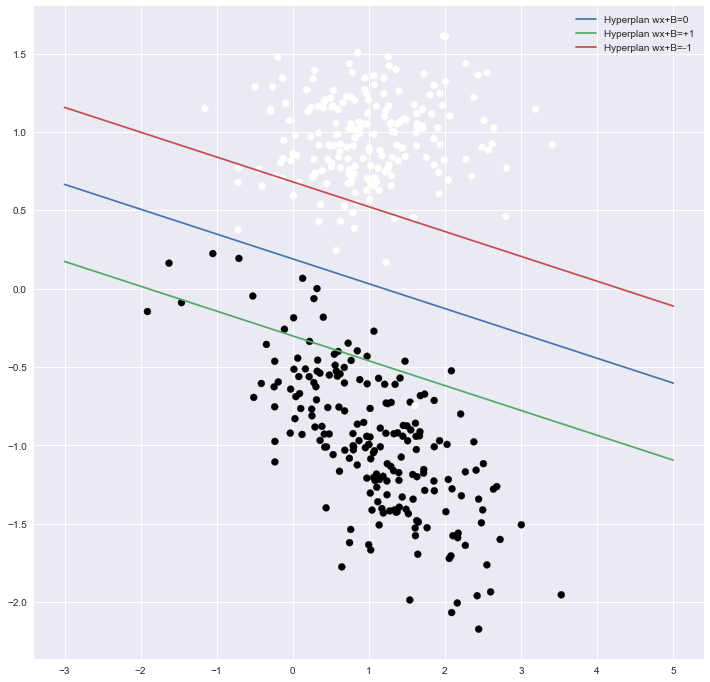

In [30]:
plotHyperplane(W[0,0],W[0,1],B)

In [ ]:
#effect of changing of 